### Clustering - can unsupervised clustering reveal genres?

In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
import IPython.display as ipd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import utils

RANDOM_STATE=53

In [19]:
(features, tracks) = utils.load_features()
genres = utils.load_genres()

small = tracks[('set', 'subset')] == 'small'
X = features[small]
y = tracks[small][('track','genre_top')]

print(X.shape, y.shape)

(8000, 518) (8000,)


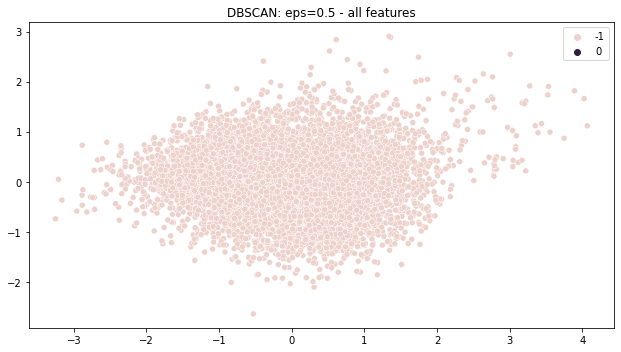

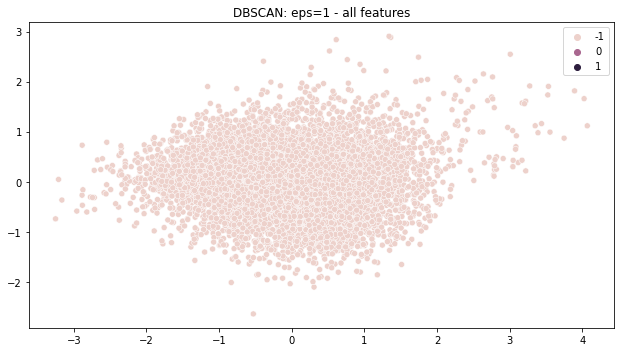

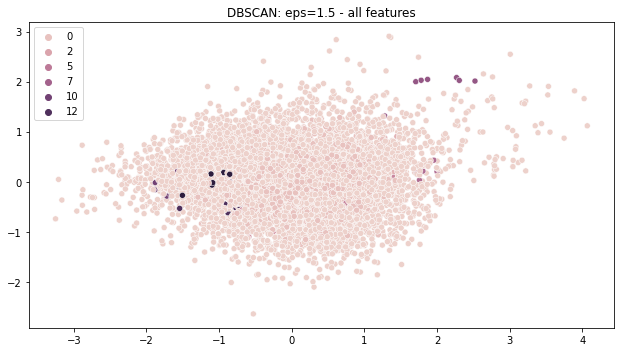

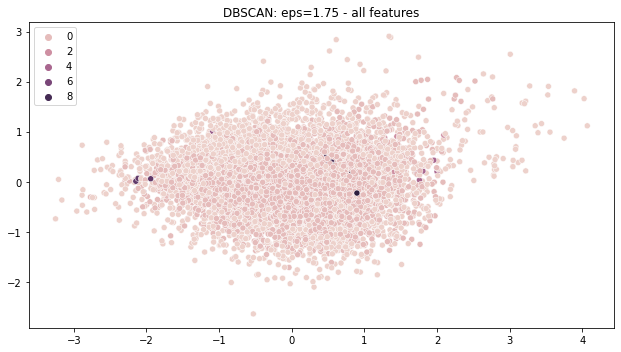

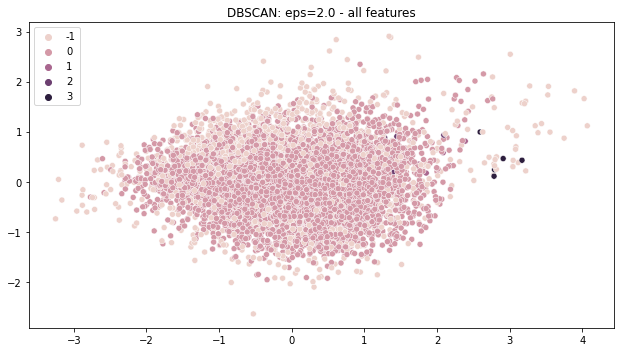

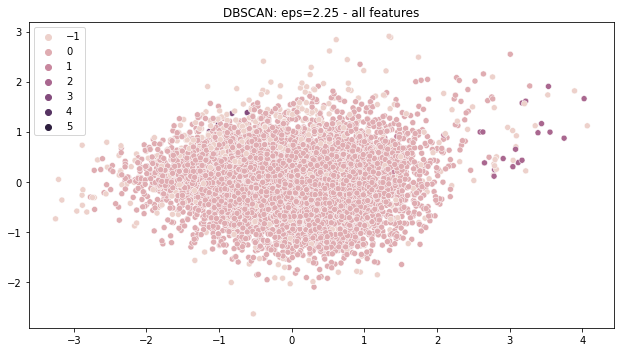

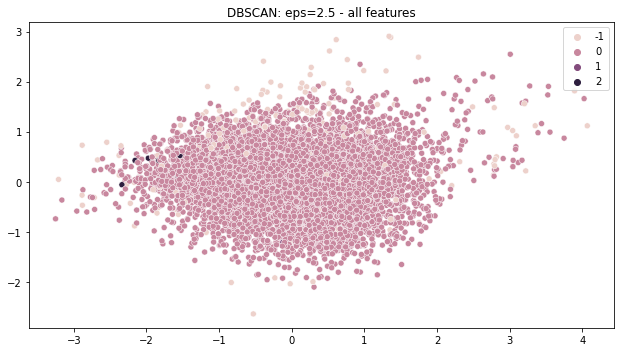

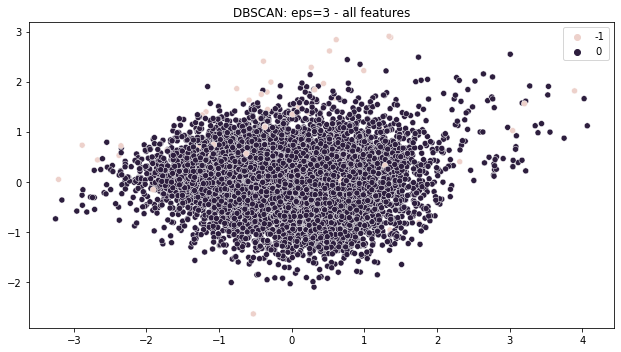

In [35]:
X_scaled = MinMaxScaler().fit_transform(X)

for eps in [0.5, 1, 1.5, 1.75, 2.0, 2.25, 2.5, 3]:
    clusters = DBSCAN(eps=eps, n_jobs=-1).fit_predict(X_scaled)
    utils.estimate_all_features(X_scaled, clusters, f'DBSCAN: eps={eps}', PCA(n_components=2), scale=False)


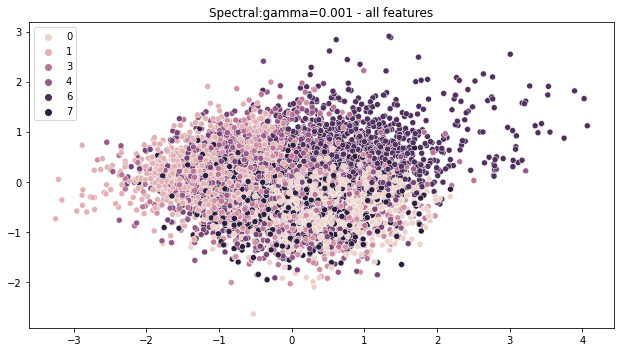

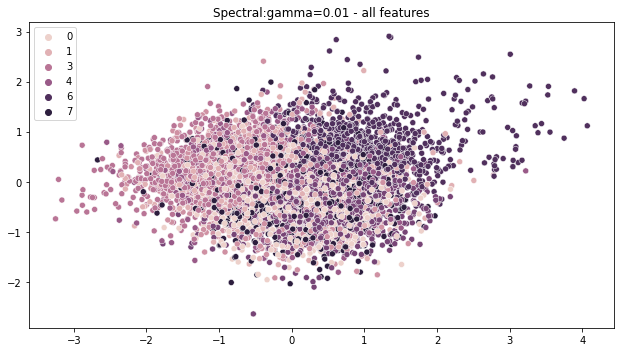

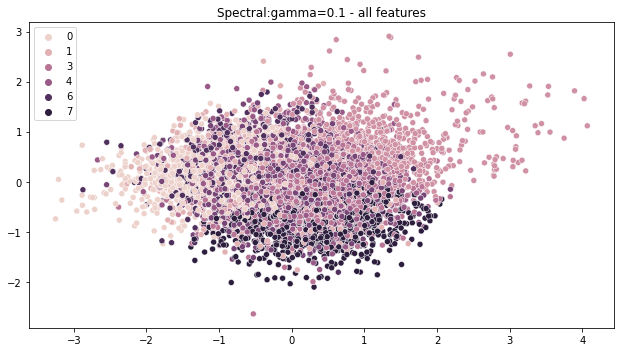

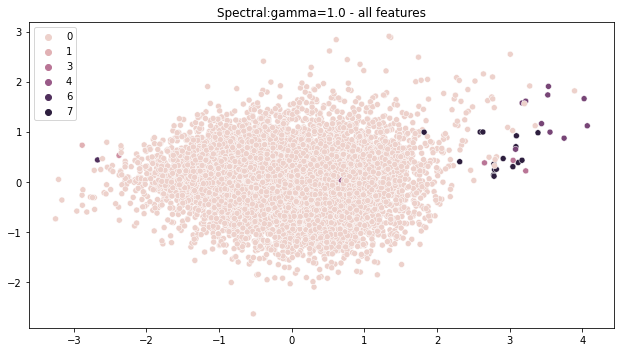

In [22]:
for gamma in [0.001, 0.01, 0.1, 1.0]:
    clusters = SpectralClustering(n_jobs=-1, gamma=gamma, random_state=RANDOM_STATE).fit_predict(X_scaled)
    utils.estimate_all_features(X_scaled, clusters, f'Spectral: gamma={gamma}', PCA(n_components=2), scale=False)

In [50]:
def cluster_genres(clusters):
    counts = {}
    for i in range(clusters.shape[0]):
        cval = f'cluster_{clusters[i]}'
        genre = y.iloc[i]
        d = counts.get(cval, {})
        d[genre] = d.get(genre, 0) + 1
        counts[cval] = d
    return pd.DataFrame(counts)

clusters = SpectralClustering(n_jobs=-1, gamma=0.1, random_state=RANDOM_STATE).fit_predict(X_scaled)
cluster_genres(clusters)
    

,cluster_3,cluster_2,cluster_6,cluster_5,cluster_1,cluster_0,cluster_4,cluster_7
Hip-Hop,388,43,22,126,88,15,92,226
International,315,28,86,116,83,131,115,126
Experimental,230,212,60,97,79,115,102,105
Pop,244,70,68,156,112,99,153,98
Rock,99,182,73,180,88,32,231,115
Folk,49,15,150,209,166,224,158,29
Electronic,267,49,42,122,69,58,80,313
Instrumental,42,68,154,112,130,297,121,76


In [51]:
clusters = SpectralClustering(n_jobs=-1, gamma=0.01, random_state=RANDOM_STATE).fit_predict(X_scaled)
cluster_genres(clusters)


,cluster_1,cluster_5,cluster_6,cluster_4,cluster_3,cluster_2,cluster_7,cluster_0
Hip-Hop,62,434,74,37,16,90,124,163
Folk,101,28,38,154,239,160,111,169
Experimental,103,201,241,61,140,85,91,78
Pop,71,196,126,74,131,113,141,148
Rock,63,75,320,95,29,73,165,180
International,53,239,82,89,297,73,70,97
Electronic,95,375,59,61,36,85,120,169
Instrumental,183,32,75,152,201,139,118,100


In [52]:
clusters = SpectralClustering(n_jobs=-1, gamma=0.001, random_state=RANDOM_STATE).fit_predict(X_scaled)
cluster_genres(clusters)


,cluster_3,cluster_0,cluster_6,cluster_4,cluster_1,cluster_5,cluster_2,cluster_7
Hip-Hop,63,427,76,37,18,91,125,163
Folk,103,25,38,153,243,158,112,168
Experimental,103,200,238,61,140,88,92,78
Pop,73,198,126,74,130,111,142,146
Rock,65,73,319,93,30,72,165,183
International,53,236,82,89,298,71,73,98
Electronic,98,373,59,61,35,86,119,169
Instrumental,182,33,75,151,203,137,121,98


### Try only with MFCC to reduce dimension

In [53]:
(features, tracks) = utils.load_features()
genres = utils.load_genres()

small = tracks[('set', 'subset')] == 'small'
X = features[small]['mfcc']
y = tracks[small][('track','genre_top')]

print(X.shape, y.shape)

(8000, 140) (8000,)


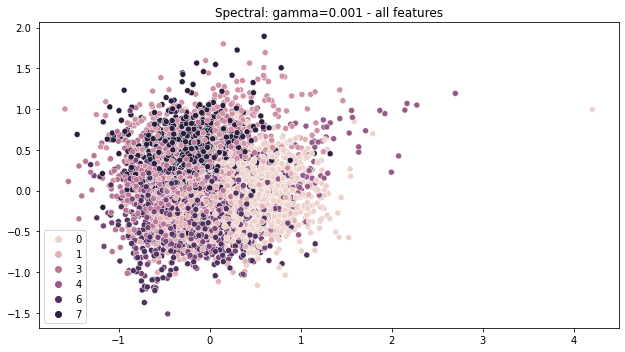

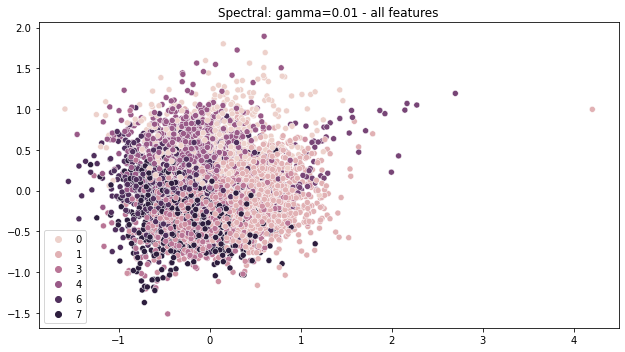

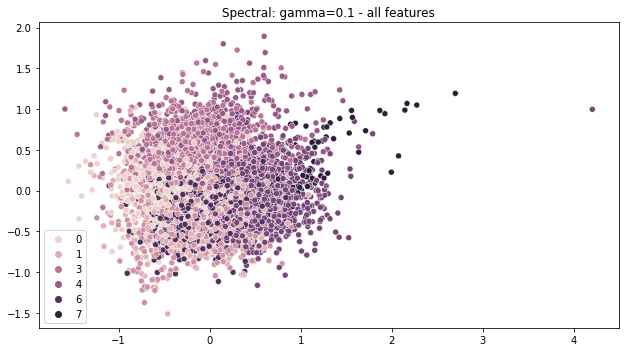

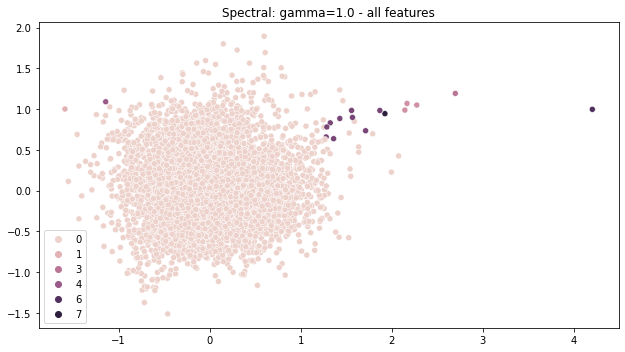

In [54]:
X_scaled = MinMaxScaler().fit_transform(X)
for gamma in [0.001, 0.01, 0.1, 1.0]:
    clusters = SpectralClustering(n_jobs=-1, gamma=gamma, random_state=RANDOM_STATE).fit_predict(X_scaled)
    utils.estimate_all_features(X_scaled, clusters, f'Spectral: gamma={gamma}', PCA(n_components=2), scale=False)

In [55]:
clusters = SpectralClustering(n_jobs=-1, gamma=0.01, random_state=RANDOM_STATE).fit_predict(X_scaled)
cluster_genres(clusters)


,cluster_2,cluster_3,cluster_1,cluster_6,cluster_0,cluster_4,cluster_7,cluster_5
Hip-Hop,204,118,472,44,15,23,122,2.0
Folk,110,42,39,117,78,523,90,1.0
Rock,363,246,46,242,13,52,38,NaN
International,225,68,220,122,196,96,47,26.0
Experimental,110,118,151,208,116,104,180,13.0
Pop,240,145,180,167,73,106,85,4.0
Instrumental,57,35,72,138,155,228,313,2.0
Electronic,86,232,328,53,35,32,150,84.0
